### import dependencies

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import datetime
warnings.filterwarnings("ignore")

In [2]:
directory_path = './data/waiting times'

In [3]:
# Initialize an empty DataFrame to store the combined data
raw_data_df = pd.DataFrame()

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Extract the attraction name from the filename
        attraction_name = os.path.splitext(filename)[0]

        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        # Add a new column 'attraction' with the attraction name
        df['attraction'] = attraction_name

        # Append the DataFrame to the combined DataFrame
        raw_data_df = pd.concat([raw_data_df, df], ignore_index=True)

In [60]:
raw_data_df['datetime'] = pd.to_datetime(raw_data_df['datetime'])
raw_data_df['date'] = pd.to_datetime(raw_data_df['date'])
raw_data_df["SACTMIN"] = pd.to_numeric(raw_data_df["SACTMIN"])
raw_data_df["SPOSTMIN"] = pd.to_numeric(raw_data_df["SPOSTMIN"])

In [61]:
def plot_waiting_times(df: pd.DataFrame, start_date: datetime, end_date: datetime, attractions: list, plot_values: str):
    """
    Plot waiting times for selected attractions on a given date.

    Parameters:
    - df: DataFrame containing waiting times data.
    - date: Date for which waiting times are plotted.
    - attractions: List of attractions to include in the plot.
    - plot_values: The column name of the data that needs to be plotted
    """

    # Filter DataFrame for the specified date and attractions
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date) & (df['attraction'].isin(attractions))]
    
    # Check if any data is available for the selected date and attractions
    if filtered_df.empty:
        print("No data available for the specified date and attractions.")
        return

    # Plot waiting times for each selected attraction
    plt.figure(figsize=(20, 6))
    for attraction in attractions:
        attraction_data = filtered_df[filtered_df['attraction'] == attraction]
        plt.plot(attraction_data['datetime'], attraction_data[plot_values], label=attraction)

    # Customize plot
    plt.title(f'{plot_values} between {start_date} and {end_date}')
    plt.xlabel('Timestamp')
    plt.ylabel(plot_values)
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.show()

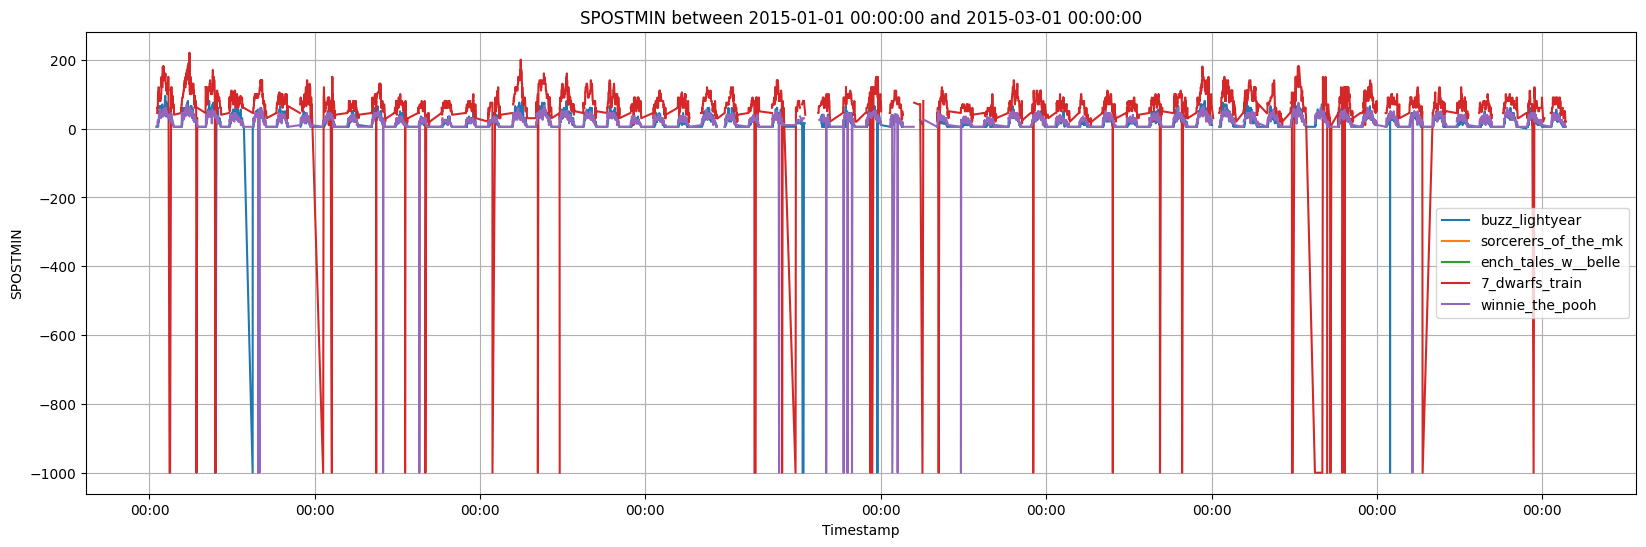

In [62]:
plot_waiting_times(df=raw_data_df, start_date=pd.to_datetime("01/01/2015"), end_date=pd.to_datetime("03/01/2015"), attractions=["buzz_lightyear", "sorcerers_of_the_mk", "ench_tales_w__belle", "7_dwarfs_train", "winnie_the_pooh"], plot_values='SPOSTMIN')

In [71]:
filtered_df = raw_data_df.copy()
filtered_df['SPOSTMIN'] = filtered_df['SPOSTMIN'].replace(-999, pd.NA)
filtered_df.loc[filtered_df['SACTMIN'] < 0, 'SACTMIN'] = pd.NA

# Group by 'attraction' and 'date'
grouped_df = filtered_df.groupby(['attraction', 'date'])

# Define a lambda function to count non-NaN measurements
count_non_nan = lambda x: x.notna().sum()  # Sum is used instead of count because notna() will return a True or False (1 or 0) and count would count both as 1

# Apply the lambda function to the 'SPOSTMIN' column within each group
count_spostmin_measurements_per_day = grouped_df['SPOSTMIN'].apply(count_non_nan)

# Reset the index and rename the resulting count column
count_spostmin_measurements_per_day = count_spostmin_measurements_per_day.reset_index(name='count_measurements')

count_spostmin_measurements_per_day = count_spostmin_measurements_per_day.groupby("attraction")["count_measurements"].mean().reset_index()

# display(count_measurements_per_day)


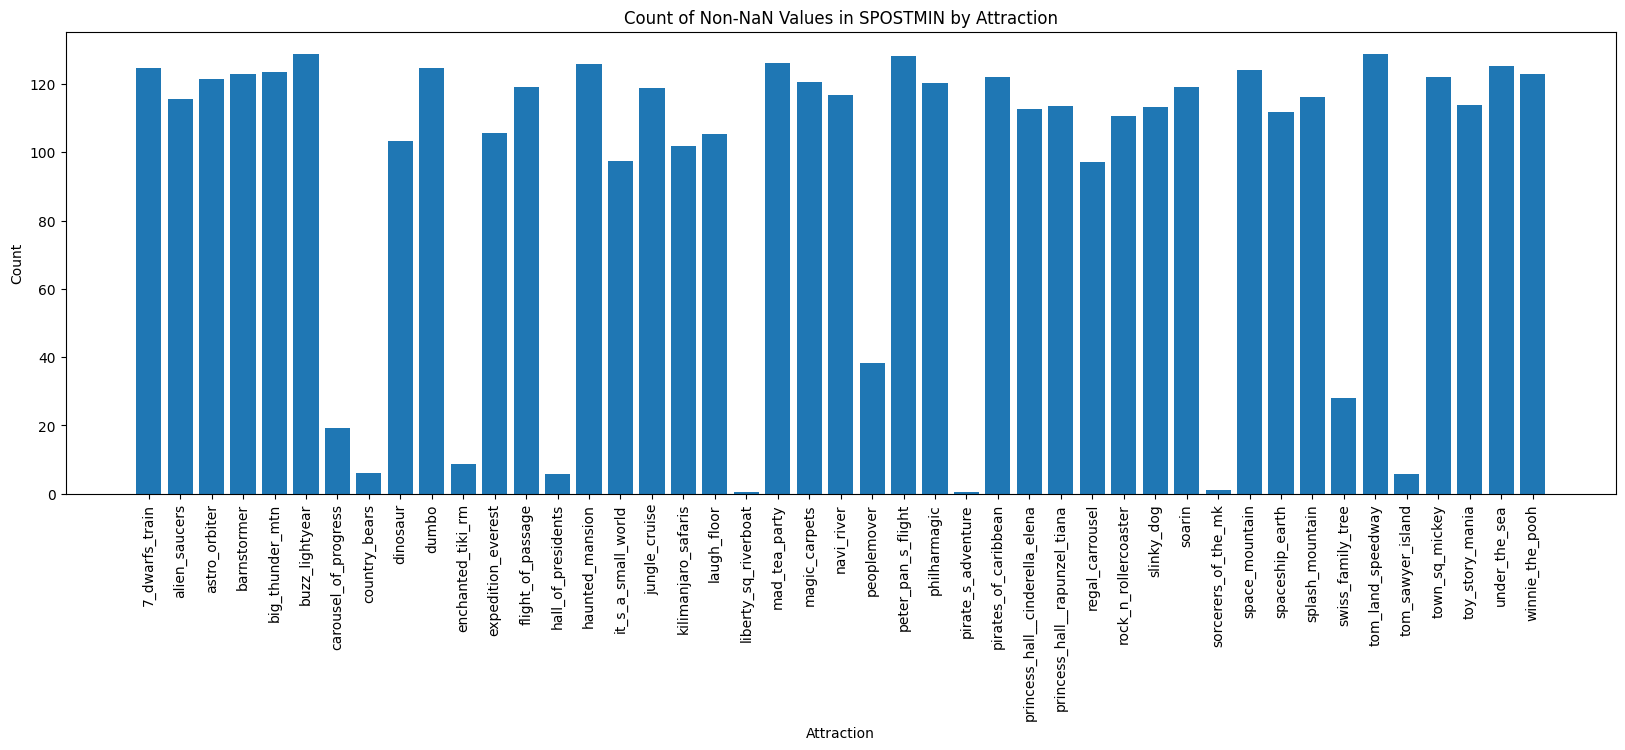

In [72]:
# Plot a bar chart
plt.figure(figsize=(20, 6))
plt.bar(count_spostmin_measurements_per_day['attraction'], count_spostmin_measurements_per_day['count_measurements'])

# Customize plot

plt.title('Count of Non-NaN Values in SPOSTMIN by Attraction')
plt.xlabel('Attraction')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

In [73]:
# # Apply the lambda function to the 'SPOSTMIN' column within each group
count_sactmin_measurements_per_day = grouped_df['SACTMIN'].apply(count_non_nan)

# # Reset the index and rename the resulting count column
count_sactmin_measurements_per_day = count_sactmin_measurements_per_day.reset_index(name='count_measurements')
count_sactmin_measurements_per_day = count_sactmin_measurements_per_day[count_sactmin_measurements_per_day['attraction'] == '7_dwarfs_train']


# count_measurements_per_day = count_measurements_per_day.groupby("attraction")["count_measurements"].mean().reset_index()

display(count_sactmin_measurements_per_day)



,attraction,date,count_measurements
0,7_dwarfs_train,2015-01-01,2
1,7_dwarfs_train,2015-01-02,4
2,7_dwarfs_train,2015-01-03,3
3,7_dwarfs_train,2015-01-04,1
4,7_dwarfs_train,2015-01-05,0
...,...,...,...
2329,7_dwarfs_train,2021-12-24,3
2330,7_dwarfs_train,2021-12-25,3
2331,7_dwarfs_train,2021-12-26,2
2332,7_dwarfs_train,2021-12-27,0


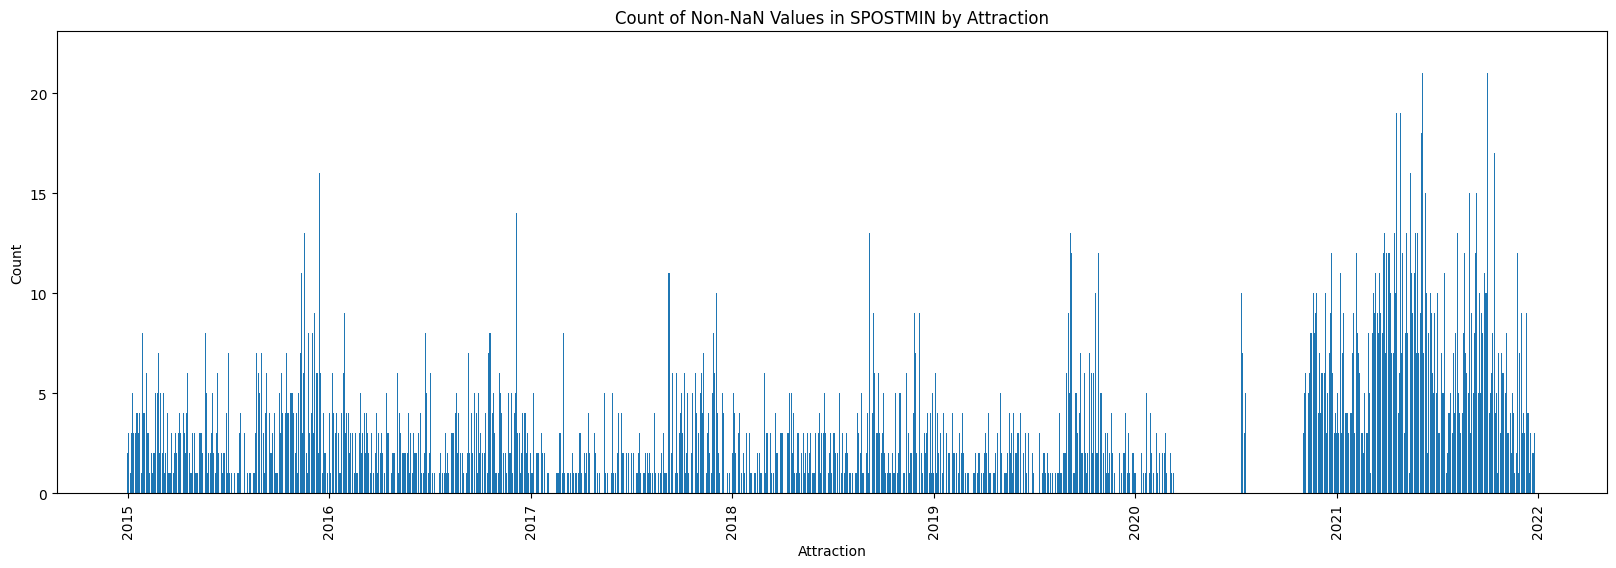

In [74]:
# Plot a bar chart
plt.figure(figsize=(20, 6))
plt.bar(count_sactmin_measurements_per_day['date'], count_sactmin_measurements_per_day['count_measurements'])

# Customize plot

plt.title('Count of Non-NaN Values in SPOSTMIN by Attraction')
plt.xlabel('Attraction')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

In [75]:
interpolated_df = filtered_df.copy()
display(filtered_df)
interpolated_df["SACTMIN"].interpolate(inplace=True)
interpolated_df["SPOSTMIN"].interpolate(inplace=True)
interpolated_df = interpolated_df.dropna(subset=['SPOSTMIN', "SACTMIN"])
interpolated_df["difference_with_estimation"] = interpolated_df["SPOSTMIN"] - interpolated_df["SACTMIN"]
display(interpolated_df)
interpolated_df[interpolated_df["attraction"] == "7_dwarfs_train"].to_csv('interpol2.csv', index=False)


# interpolated_df["SACTMIN"] = pd.to_numeric(interpolated_df["SACTMIN"])
# interpolated_df["SPOSTMIN"] = pd.to_numeric(interpolated_df["SPOSTMIN"])
# interpolated_df["SACTMIN"].interpolate()
# interpolated_df["SPOSTMIN"].interpolate()
# interpolated_df = interpolated_df.dropna(subset=['SPOSTMIN', "SACTMIN"])
# interpolated_df["difference_with_estimation"] = interpolated_df["SPOSTMIN"] - interpolated_df["SACTMIN"]
# display(interpolated_df)
filtered_df[filtered_df["attraction"] == "7_dwarfs_train"].to_csv('interpol1.csv', index=False)
# interpolated_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
# interpolated_df.interpolate(method='linear', limit_direction='forward', axis=0)
# filtered_df[filtered_df["attraction"] == "7_dwarfs_train"].to_csv('interpol2.csv', index=False)



,date,datetime,SACTMIN,SPOSTMIN,attraction
0,2015-01-01,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,2015-01-01,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
2,2015-01-01,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
3,2015-01-01,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,2015-01-01,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
...,...,...,...,...,...
10306135,2021-12-28,2021-12-28 22:34:35,NaN,5.0,winnie_the_pooh
10306136,2021-12-28,2021-12-28 22:42:15,NaN,5.0,winnie_the_pooh
10306137,2021-12-28,2021-12-28 22:48:12,NaN,5.0,winnie_the_pooh
10306138,2021-12-28,2021-12-28 22:54:10,NaN,5.0,winnie_the_pooh


,date,datetime,SACTMIN,SPOSTMIN,attraction,difference_with_estimation
3,2015-01-01,2015-01-01 08:09:12,54.333333,60.0,7_dwarfs_train,5.666667
4,2015-01-01,2015-01-01 08:16:12,54.666667,60.0,7_dwarfs_train,5.333333
6,2015-01-01,2015-01-01 08:23:12,55.610465,60.0,7_dwarfs_train,4.389535
7,2015-01-01,2015-01-01 08:29:12,56.220930,60.0,7_dwarfs_train,3.77907
8,2015-01-01,2015-01-01 08:37:13,56.831395,90.0,7_dwarfs_train,33.168605
...,...,...,...,...,...,...
10306135,2021-12-28,2021-12-28 22:34:35,15.000000,5.0,winnie_the_pooh,-10.0
10306136,2021-12-28,2021-12-28 22:42:15,15.000000,5.0,winnie_the_pooh,-10.0
10306137,2021-12-28,2021-12-28 22:48:12,15.000000,5.0,winnie_the_pooh,-10.0
10306138,2021-12-28,2021-12-28 22:54:10,15.000000,5.0,winnie_the_pooh,-10.0


In [78]:
condition = interpolated_df['SACTMIN'] < 0
filtered_rows = interpolated_df[condition]
display(filtered_rows)
# Display the rows along with 10 columns before and 10 columns after 'SACTMIN'
for index, row in filtered_rows.iterrows():
    # print(index)
    start_index = (index - 100)
# print(start_index)
    end_index = (index + 31)
# print(end_index)
    print(interpolated_df.loc[start_index:end_index])
    print('-------------------------------------------')

,date,datetime,SACTMIN,SPOSTMIN,attraction,difference_with_estimation


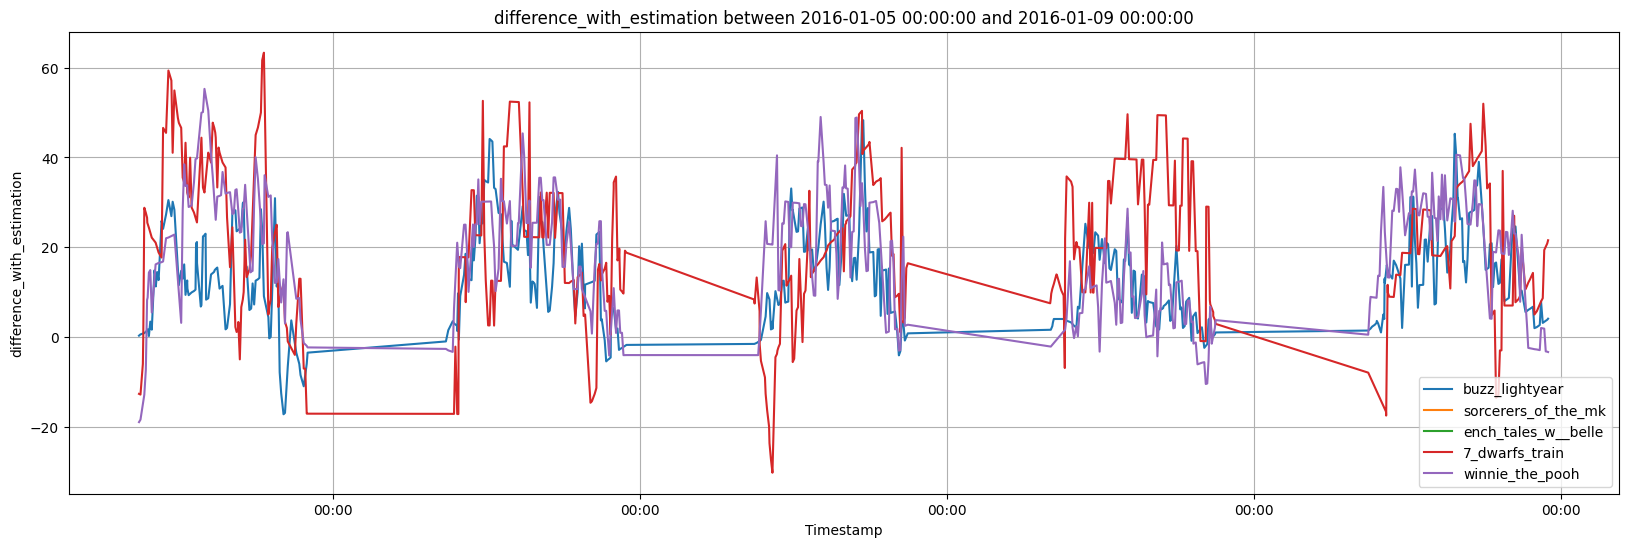

In [77]:
plot_waiting_times(df=interpolated_df, start_date=pd.to_datetime("05 january 2016"), end_date=pd.to_datetime("09 january 2016"), 
                   attractions=["buzz_lightyear", "sorcerers_of_the_mk", "ench_tales_w__belle", "7_dwarfs_train", "winnie_the_pooh"], plot_values="difference_with_estimation")


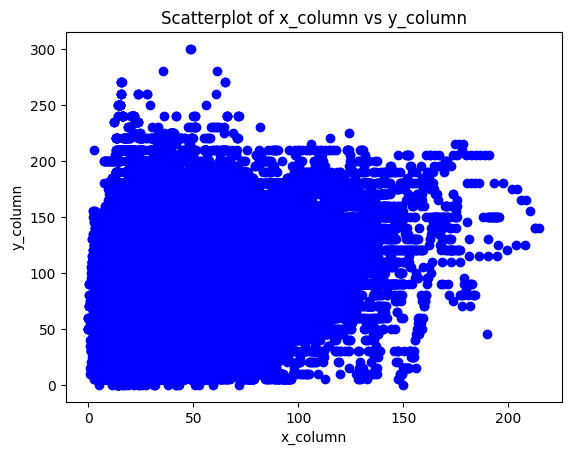

In [79]:
x_column_name = 'x_column'
y_column_name = 'y_column'
interpolated_d = interpolated_df[interpolated_df['attraction'] == "7_dwarfs_train"]

# Create a scatterplot
plt.scatter(interpolated_d["SACTMIN"], interpolated_d["SPOSTMIN"], color='blue', marker='o')

# Add labels and title
plt.xlabel(f'{x_column_name}')
plt.ylabel(f'{y_column_name}')
plt.title(f'Scatterplot of {x_column_name} vs {y_column_name}')

# Display the scatterplot
plt.show()

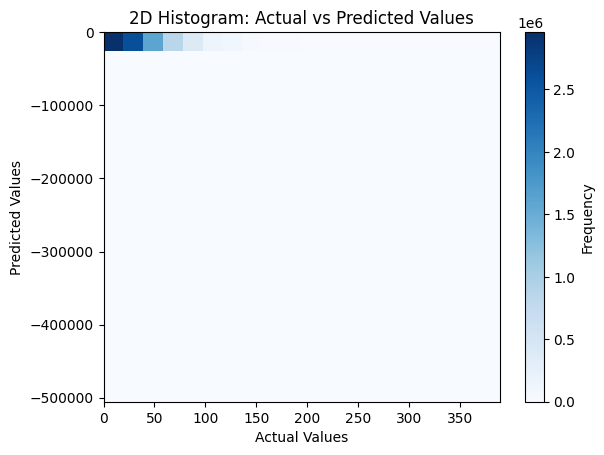

In [83]:
y_actual = interpolated_df["SPOSTMIN"]
y_predicted = interpolated_df["difference_with_estimation"]

plt.hist2d(y_actual, y_predicted, bins=(20, 20), cmap='Blues')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('2D Histogram: Actual vs Predicted Values')

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Frequency')

# Display the 2D histogram
plt.show()